In [1]:
!pip install datasets
from datasets import load_dataset

data_files = {
    "train": "drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/test.04.jsonl",
}

# Muat dataset
dataset = load_dataset("json", data_files=data_files)
print(dataset)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['category', 'gold_labels', 'id', 'paragraphs', 'source', 'source_url', 'summary'],
        num_rows: 3752
    })
})


In [2]:
train_data = dataset['train']
print(train_data[0])

{'category': 'tajuk utama', 'gold_labels': [[True], [False, False, False], [False], [True], [True], [False], [False], [False], [False, False], [False], [False, False, False], [False, False], [False]], 'id': '1504151262-wiranto-yakin-uang-bos-first-travel-bisa-ditemukan', 'paragraphs': [[['Jakarta', ',', 'CNN', 'Indonesia', '-', '-', 'Menteri', 'Koordinator', 'bidang', 'Politik', ',', 'Hukum', ',', 'dan', 'Keamanan', '(', 'Menko', 'Polhukam', ')', 'Wiranto', 'yakin', 'uang', 'jemaah', 'yang', 'dikumpulkan', 'bos', 'First', 'Travel', ',', 'Andika', 'Surachman', 'dan', 'Anniesa', 'Hasibuan', ',', 'bisa', 'ditemukan', '.']], [['"', 'Uang', 'itu', 'kan', 'cuma', 'pindah', 'tempat', ',', 'enggak', 'ada', 'uang', 'menguap', ',', 'itu', 'enggak', 'ada', '.'], ['Enggak', 'ada', 'tiba-tiba', 'uang', 'hilang', 'menguap', ',', 'mesti', 'pindah', 'tempat', '.'], ['Kita', 'cari', 'itu', ',', '"', 'ujar', 'Wiranto', 'di', 'Hotel', 'Arya', 'Duta', ',', 'Jakarta', ',', 'Rabu', '\xa0', '(', '30', '/', '

In [3]:
def join_data(dataset):
    documents = []
    summaries = []
    for item in dataset:
        # Menggabungkan kalimat dalam paragraf menjadi satu string
        document = [" ".join(sent) for para in item["paragraphs"] for sent in para]
        document = " ".join(document)  # Gabungkan semua paragraf menjadi satu string

        # Menggabungkan ringkasan
        summary = " ".join([" ".join(s) for s in item["summary"]])  # Gabungkan semua elemen dalam summary

        documents.append(document)
        summaries.append(summary)

    return documents, summaries

# Memproses data
train_docs, train_summaries = join_data(train_data)

In [4]:
print(train_docs[0])
print(train_summaries[0])
len(train_docs)

Jakarta , CNN Indonesia - - Menteri Koordinator bidang Politik , Hukum , dan Keamanan ( Menko Polhukam ) Wiranto yakin uang jemaah yang dikumpulkan bos First Travel , Andika Surachman dan Anniesa Hasibuan , bisa ditemukan . " Uang itu kan cuma pindah tempat , enggak ada uang menguap , itu enggak ada . Enggak ada tiba-tiba uang hilang menguap , mesti pindah tempat . Kita cari itu , " ujar Wiranto di Hotel Arya Duta , Jakarta , Rabu   ( 30 / 8 ) . Pernyataan Wiranto itu merujuk tipisnya jumlah dana yang berada di rekening bos First Travel , sementara jemaah yang dana keberangkatan umrahnya ditilap mencapai sekitar Rp 848 miliar . Wiranto mengatakan , uang yang diambil bos First Travel tersebut penting untuk ditemukan karena harus dikembalikan kepada para jemaah yang telah ditipu . Mantan Panglima ABRI itu juga menyampaikan , First Travel tetap menjadi pihak yang harus bertanggung jawab untuk mengembalikan uang para jemaah . " Yang gantinya siapa yang merugikan rakyat , lagi dilihat asetn

3752

In [5]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

# test
train_docs, test_docs, train_summaries, test_summaries = train_test_split(
    train_docs, train_summaries, test_size=0.05, random_state=42
)

train_docs, val_docs, train_summaries, val_summaries = train_test_split(
    train_docs, train_summaries, test_size=0.2, random_state=42
)

train_dataset = Dataset.from_dict({"document": train_docs, "summary": train_summaries})
val_dataset = Dataset.from_dict({"document": val_docs, "summary": val_summaries})
test_dataset = Dataset.from_dict({"document": test_docs, "summary": test_summaries})

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

print(dataset)

print(f"Train: {len(train_docs)}")
print(f"Validation: {len(val_docs)}")
print(f"Test: {len(test_docs)}")

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 2851
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 713
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 188
    })
})
Train: 2851
Validation: 713
Test: 188


In [6]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer, GenerationConfig

# Memuat tokenizer dan model
tokenizer = MT5Tokenizer.from_pretrained("google/mt5-base")
model = MT5ForConditionalGeneration.from_pretrained("google/mt5-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [7]:
def make_prompt(example_indices_full, example_index_to_summarize):
  prompt = ''
  for index in example_indices_full:
    document = train_docs[index]
    summary = train_summaries[index]
    prompt += f"""

Example Text: {document}

Example Summary: {summary}
    """
  document = train_docs[example_index_to_summarize]
  prompt += f"""

Text: {document}

Summary:
    """
  return prompt

# generation_config = GenerationConfig(max_new_tokens = 50, do_sample = True, temperature = 0.5)

In [8]:
def preprocess_function(examples):
    inputs = examples['document']
    targets = examples["summary"]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    # Tokenisasi target (summary)
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2851 [00:00<?, ? examples/s]

Map:   0%|          | 0/713 [00:00<?, ? examples/s]

Map:   0%|          | 0/188 [00:00<?, ? examples/s]

In [9]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./summarization_results",   # Direktori untuk menyimpan model
    evaluation_strategy="steps",                  # Evaluasi setiap beberapa step
    eval_steps=500,                               # Frekuensi evaluasi
    save_steps=0,                               # Frekuensi menyimpan model
    logging_dir=None,                         # Direktori log
    learning_rate=0.001,                           # Learning rate
    per_device_train_batch_size=4,                # Batch size per device
    per_device_eval_batch_size=4,                 # Batch size untuk evaluasi
    num_train_epochs=5,                           # Jumlah epoch
    weight_decay=0.01,                            # Regularisasi L2
    save_total_limit=2,                           # Simpan hanya 2 checkpoint terbaik
    load_best_model_at_end=True,                  # Load model terbaik berdasarkan evaluasi
    report_to="none",                              # Nonaktifkan logging ke W&B
    # gradient_checkpointing=True,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [10]:
from transformers import Trainer

# Inisialisasi Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

# Mulai proses training
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss
500,1.184500,0.573874
1000,0.615100,0.532192
1500,0.496000,0.519532
2000,0.397100,0.521608
2500,0.298000,0.517087
3000,0.251500,0.553576
3500,0.193800,0.565044


Could not locate the best model at ./summarization_results/checkpoint-2500/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


TrainOutput(global_step=3565, training_loss=0.48499609691732226, metrics={'train_runtime': 4206.7759, 'train_samples_per_second': 3.389, 'train_steps_per_second': 0.847, 'total_flos': 1.709240260755456e+16, 'train_loss': 0.48499609691732226, 'epoch': 5.0})

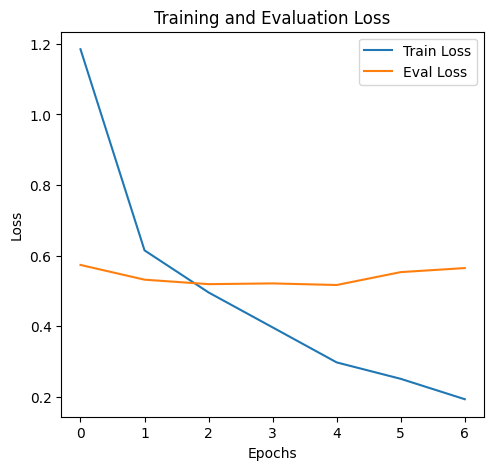

In [11]:
import matplotlib.pyplot as plt
# Mengambil data dari log
train_logs = trainer.state.log_history

# Membuat list untuk loss dan accuracy
train_loss = []
eval_loss = []

for log in train_logs:
    if 'loss' in log:
        train_loss.append(log['loss'])
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])

# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label="Train Loss")
plt.plot(range(len(eval_loss)), eval_loss, label="Eval Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()

# Tampilkan plot
plt.show()


In [18]:
trainer.save_model("drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5")
tokenizer.save_pretrained("drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5-tokenizer")

('drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5-tokenizer/tokenizer_config.json',
 'drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5-tokenizer/special_tokens_map.json',
 'drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5-tokenizer/spiece.model',
 'drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5-tokenizer/added_tokens.json')

In [21]:
tokenizer_finetune = MT5Tokenizer.from_pretrained("drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5-tokenizer")
model_finetune = MT5ForConditionalGeneration.from_pretrained("drive/MyDrive/Colab Notebooks/dataset/nlp/indosum/fine_tuned_mT5")

In [22]:
def make_prompt(example_indices_full, example_index_to_summarize):
    prompt = ''
    for index in example_indices_full:
        document = train_docs[index]
        summary = train_summaries[index]
        prompt += f"""

Example Text: {document}

Example Summary: {summary}
        """
    document = test_docs[example_index_to_summarize]
    prompt += f"""

Text: {document}

Summary:
    """
    return prompt

In [26]:
import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

# Daftar untuk menyimpan hasil ringkasan dan referensi
generated_summaries = []
reference_summaries = []

# Menggunakan dataset pengujian
for example_index_to_summarize in range(10):
    # Mengambil beberapa contoh untuk prompt
    example_indices_full = [10]
    one_shot_prompt = make_prompt(example_indices_full, example_index_to_summarize)

    # Menghasilkan ringkasan
    generation_config = GenerationConfig(max_new_tokens=50, do_sample=True, temperature=0.5)
    inputs = tokenizer(one_shot_prompt, return_tensors='pt', truncation=True)

    output = tokenizer.decode(
        model.generate(
            inputs["input_ids"],
            generation_config=generation_config,
        )[0],
        skip_special_tokens=True
    )

    # Menyimpan ringkasan yang dihasilkan dan referensi
    generated_summaries.append(output)
    reference_summaries.append(test_summaries[example_index_to_summarize])

# Menghitung skor BLEU untuk setiap ringkasan yang dihasilkan
bleu_scores = []
for generated, reference in zip(generated_summaries, reference_summaries):
    reference_tokens = reference.split()  # Tokenisasi referensi
    generated_tokens = generated.split()  # Tokenisasi hasil
    score = sentence_bleu([reference_tokens], generated_tokens)  # Menghitung skor BLEU
    bleu_scores.append(score)

# Menampilkan hasil
for i in range(10):
    print(f"Real Text {i + 1}:\n{test_docs[i]}\n")
    print(f"Reference Summary {i + 1}:\n{reference_summaries[i]}\n")
    print(f"Generated Summary {i + 1}:\n{generated_summaries[i]}\n")
    print(f"BLEU Score {i + 1}: {bleu_scores[i]}\n")
    print("=======================================")

# Rata-rata skor BLEU
average_bleu_score = np.mean(bleu_scores)
print(f"Average BLEU Score: {average_bleu_score}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Real Text 1:
Jakarta , CNN Indonesia - - Penyelidik Amerika Serikat dilaporkan sudah bertemu dengan Christopher Steele , mantan mata-mata Inggris yang membocorkan isu hubungan antara tim kampanye Donald Trump dan Rusia pada masa pemilihan umum 2016 . Informasi mengenai pertemuan ini dihimpun oleh CNN dari dua sumber yang dekat dengan penyelidikan . CNN melaporkan , pertemuan antara penyelidik dari dewan khusus pimpinan mantan Kepala FBI , Robert Mueller , bertemu dengan Steele pada musim panas lalu . " CNN mengetahui bahwa FBI dan komunitas intelijen AS menanggapi bocoran Steele lebih serius ketimbang badan-badan lain yang mengetahuinya , " demikian bunyi laporan CNN , Kamis ( 5 / 10 ) . Nama Steele menjadi perhatian publik setelah merilis berkas penelitian politik setebal 35 halaman yang menguak kemungkinan intervensi Rusia untuk memenangkan Trump dalam pemilu lalu . Berkas itu mencakup klaim bahwa Rusia memiliki video prostitusi yang direkam saat Trump mengunjungi salah satu hotel me

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [27]:
# Daftar untuk menyimpan hasil ringkasan dan referensi
generated_summaries = []
reference_summaries = []

# Menggunakan dataset pengujian
for example_index_to_summarize in range(10):
    # Mengambil beberapa contoh untuk prompt
    example_indices_full = [10, 60, 110, 160, 210]
    few_shot_prompt = make_prompt(example_indices_full, example_index_to_summarize)

    # Menghasilkan ringkasan
    generation_config = GenerationConfig(max_new_tokens=50, do_sample=True, temperature=0.5)
    inputs = tokenizer(few_shot_prompt, return_tensors='pt', truncation=True)

    output = tokenizer.decode(
        model.generate(
            inputs["input_ids"],
            generation_config=generation_config,
        )[0],
        skip_special_tokens=True
    )

    # Menyimpan ringkasan yang dihasilkan dan referensi
    generated_summaries.append(output)
    reference_summaries.append(test_summaries[example_index_to_summarize])

# Menghitung skor BLEU untuk setiap ringkasan yang dihasilkan
bleu_scores = []
for generated, reference in zip(generated_summaries, reference_summaries):
    reference_tokens = reference.split()  # Tokenisasi referensi
    generated_tokens = generated.split()  # Tokenisasi hasil
    score = sentence_bleu([reference_tokens], generated_tokens)  # Menghitung skor BLEU
    bleu_scores.append(score)

# Menampilkan hasil
for i in range(10):
    print(f"Real Text {i + 1}:\n{test_docs[i]}\n")
    print(f"Reference Summary {i + 1}:\n{reference_summaries[i]}\n")
    print(f"Generated Summary {i + 1}:\n{generated_summaries[i]}\n")
    print(f"BLEU Score {i + 1}: {bleu_scores[i]}\n")
    print("=======================================")

# Rata-rata skor BLEU
average_bleu_score = np.mean(bleu_scores)
print(f"Average BLEU Score: {average_bleu_score}")

Real Text 1:
Jakarta , CNN Indonesia - - Penyelidik Amerika Serikat dilaporkan sudah bertemu dengan Christopher Steele , mantan mata-mata Inggris yang membocorkan isu hubungan antara tim kampanye Donald Trump dan Rusia pada masa pemilihan umum 2016 . Informasi mengenai pertemuan ini dihimpun oleh CNN dari dua sumber yang dekat dengan penyelidikan . CNN melaporkan , pertemuan antara penyelidik dari dewan khusus pimpinan mantan Kepala FBI , Robert Mueller , bertemu dengan Steele pada musim panas lalu . " CNN mengetahui bahwa FBI dan komunitas intelijen AS menanggapi bocoran Steele lebih serius ketimbang badan-badan lain yang mengetahuinya , " demikian bunyi laporan CNN , Kamis ( 5 / 10 ) . Nama Steele menjadi perhatian publik setelah merilis berkas penelitian politik setebal 35 halaman yang menguak kemungkinan intervensi Rusia untuk memenangkan Trump dalam pemilu lalu . Berkas itu mencakup klaim bahwa Rusia memiliki video prostitusi yang direkam saat Trump mengunjungi salah satu hotel me